In [1]:
import cv2
import matplotlib.pyplot as plt 


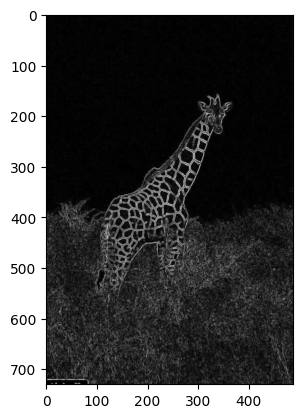

In [ ]:
image = cv2.imread("./giraffe.jpg" , cv2.IMREAD_GRAYSCALE)

#sobel edge detector 

sobel_x = cv2.Sobel(image , cv2.CV_64F , 1, 0 , ksize=3) 
sobel_y = cv2.Sobel(image , cv2.CV_64F , 0, 1 , ksize=3)

sobel_combined = cv2.magnitude(sobel_x , sobel_y)
plt.imshow(sobel_combined  , cmap="gray")


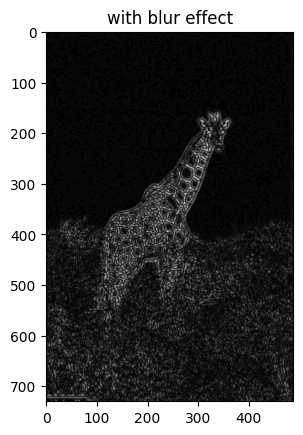

In [14]:
## laplacian
ksize = 11
blured = cv2.GaussianBlur(image , (ksize, ksize) , 0, borderType=cv2.BORDER_DEFAULT)
laplacian =  cv2.Laplacian(blured , cv2.CV_64F , ksize=3)
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.title("with blur effect")
plt.imshow(laplacian_abs , cmap='gray')

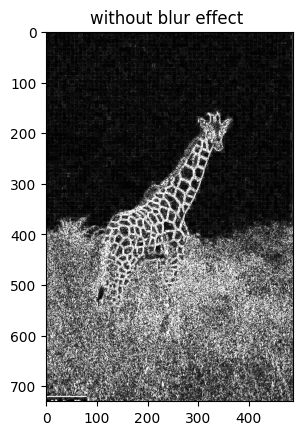

In [13]:
laplacian =  cv2.Laplacian(image , cv2.CV_64F , ksize=3)
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.title("without blur effect ")
plt.imshow(laplacian_abs , cmap='gray')

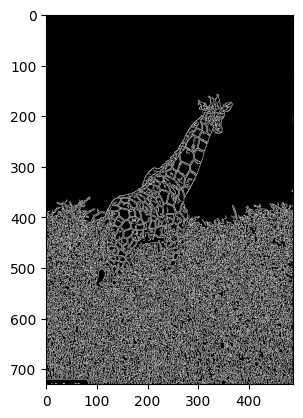

In [25]:
## canny 

canny_edges = cv2.Canny(image , 50  , 150 )

plt.imshow(canny_edges , cmap='gray')

🔹 Edge nedir?

    Görüntüde ani intensity (parlaklık) veya renk değişimi olan yer.

    Aslında renk değil, renk/geçiş değişimi önemlidir.

    O yüzden hep türev (derivative) bazlı hesaplanır.

🎯 Neden kenar buluruz (edge detection)?

    Preprocessing: Asıl işleme geçmeden önce temiz veri (örneğin segmentasyon öncesi).

    Feature Extraction: Nesnenin karakteristik hatları çıkarılır.

    Shape Analysis: Şeklin çevresi, köşe, kontur, vs. belirlenir.

🔧 KULLANILAN YÖNTEMLER
1️⃣ Sobel Filter

    1. türev alır → gradyan hesaplar.

    Yönlüdür: Gx (yatay), Gy (dikey)

    Sonuç:

    magnitude = sqrt(Gx^2 + Gy^2)
    direction = arctan(Gy / Gx)

    Kenarların hem gücü hem yönü çıkar.

    Gürültüye çok hassas değildir ama tam kenar ortasını net vermez.

2️⃣ Laplacian Filter

    2. türev alır → değişimin bile değişimini hesaplar.

    Kenarın olduğu orta noktayı bulmakta başarılıdır.

    Ama gürültüye çok hassastır, çünkü küçük değişimleri bile patlatır.

    Genelde önce blur yapılır:

    blurred = cv2.GaussianBlur(image, (3,3), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

3️⃣ Canny Edge Detection

    Komple bir algoritmadır.

    Adımlar:

        Gaussian Blur → Gürültüyü azaltır.

        Sobel Filter → Gradyanı bulur.

        Gradient Direction → Kenar hangi yöne gidiyor?

        Non-Maximum Suppression → Kenar inceltilir.

        Double Thresholding →

            Strong edge

            Weak edge

            Non-edge

        Edge Tracking by Hysteresis → Zayıf kenarlar güçlüyle bağlıysa tutulur, değilse atılır.


